In [5]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt
from matplotlib.image import imread

print("libraries printed")

libraries printed


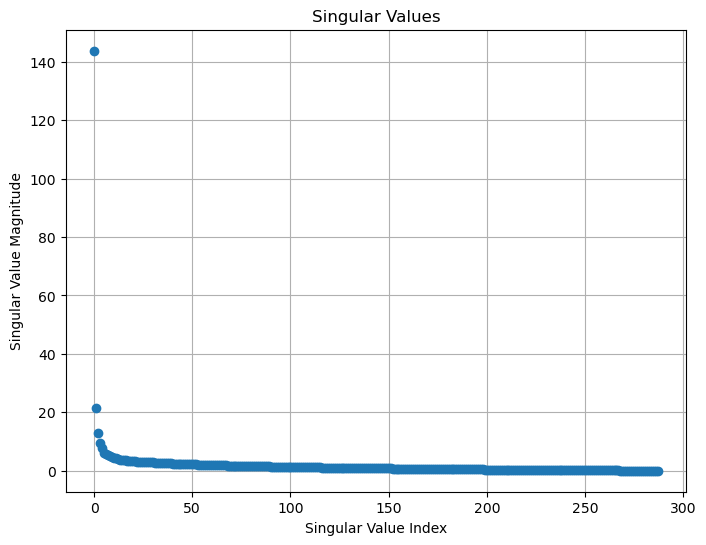

Compression Ratio (k=10): 14.38
Compression Ratio (k=20): 7.19
Compression Ratio (k=40): 3.59
Compression Ratio (k=60): 2.40


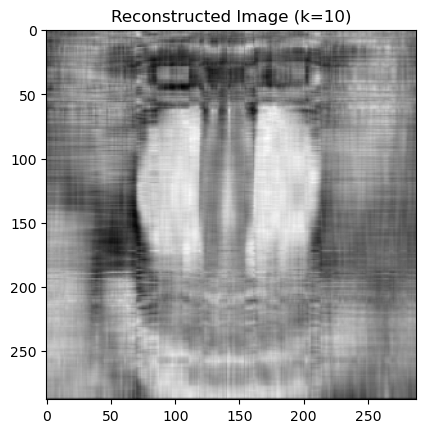

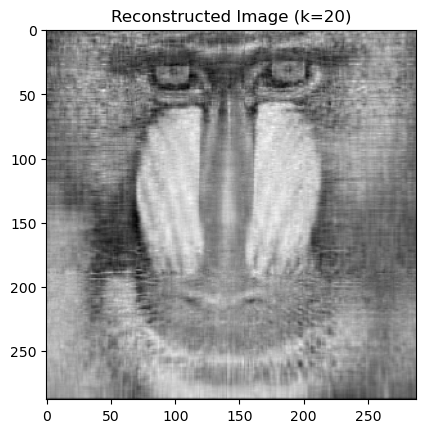

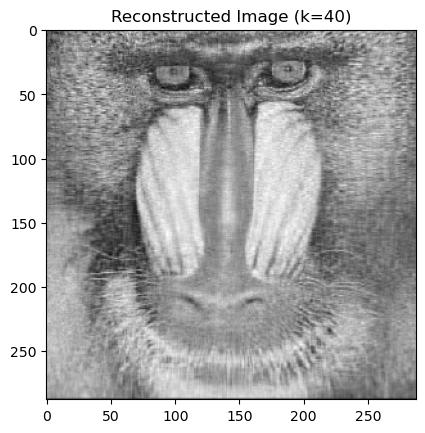

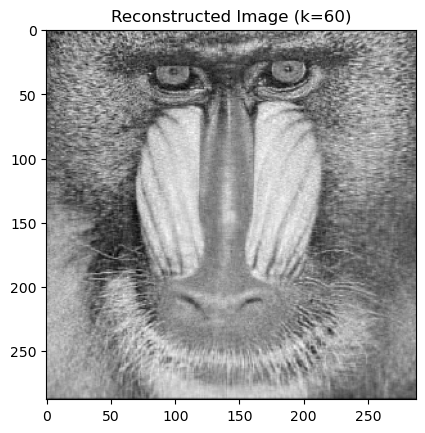


Compression Ratios:
k  | Compression Ratio
-- | -----------------
10 | 14.38
20 | 7.19
40 | 3.59
60 | 2.40


In [4]:
# code was done by Arvind (me) and im solely responsible for this
# Step 1: we should  Read the image and convert it to grayscale
# Define the full file path to your image lol in my case i downloaed the image in my downloads folder
image_path = "C:\\Users\\arvin\\Downloads\\mandrill_color.png"

# Read the image and convert it to grayscale
image = imread(image_path)
gray_image = np.mean(image, axis=2)

# Step 2: Perform SVD on the grayscale image
U, S, Vt = svd(gray_image)

# Plot the singular values
plt.figure(figsize=(8, 6))
plt.plot(S, 'o')
plt.title('Singular Values')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value Magnitude')
plt.grid(True)
plt.show()

# Step 3 and 4: Choose k values and reconstruct the image
k_values = [10, 20, 40, 60]  # Specify the range of k values
compression_ratios = []

for k in k_values:
    # Reconstruct the image using the top k singular values and vectors
    approx_image = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]
    
    # Display the reconstructed image
    plt.figure()
    plt.imshow(approx_image, cmap='gray')
    plt.title(f'Reconstructed Image (k={k})')
    
    # Calculate the compression ratio
    original_size = gray_image.size
    compressed_size = (U[:, :k].size + S[:k].size + Vt[:k, :].size)
    compression_ratio = original_size / compressed_size
    compression_ratios.append(compression_ratio)
    print(f'Compression Ratio (k={k}): {compression_ratio:.2f}')

plt.show()

# Create a table of compression ratios
print("\nCompression Ratios:")
print("k  | Compression Ratio")
print("-- | -----------------")
for i in range(len(k_values)):
    print(f"{k_values[i]:2} | {compression_ratios[i]:.2f}")
